In [1]:
import pandas as ad
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu,gaussian
from skimage import exposure,img_as_float
from skimage.segmentation import  flood_fill,clear_border
from skimage.morphology import remove_small_objects, binary_closing
from skimage import measure
import os

thresholding otsu

C:\Users\gamer\AppData\Local\Temp\ipykernel_25432\4264290556.py:11: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))


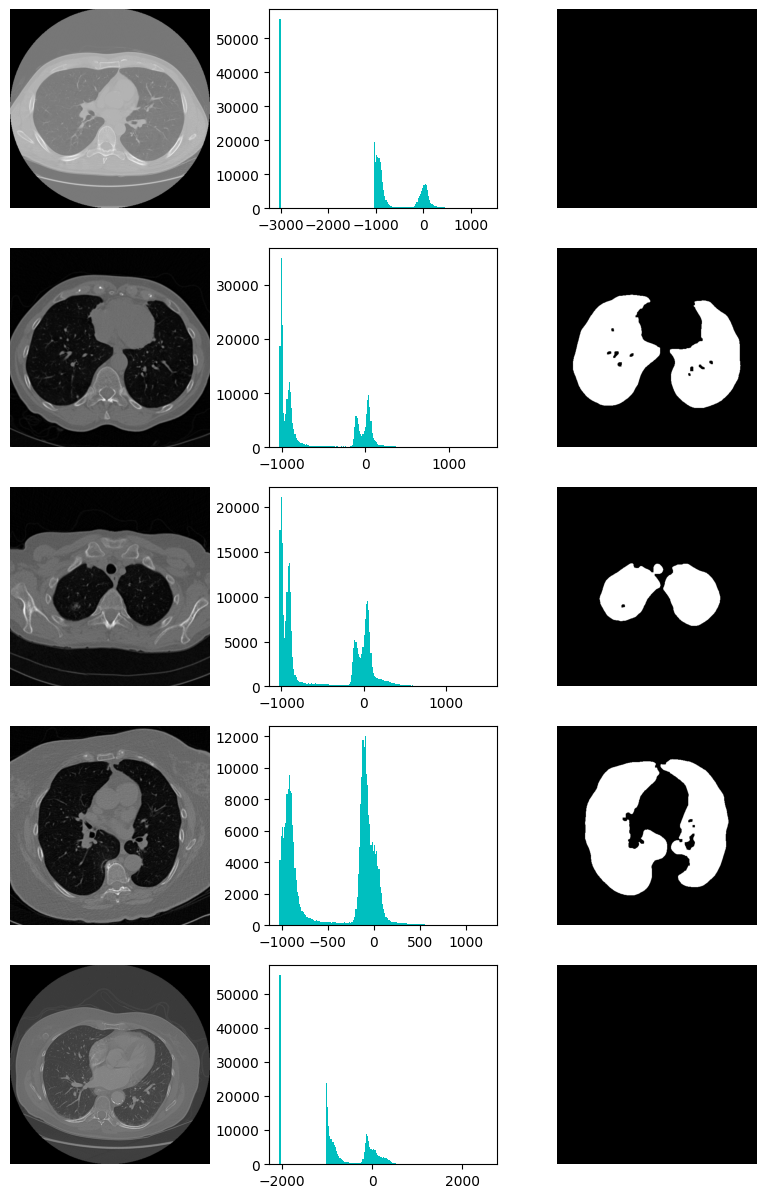

In [3]:
path = "D:/fin_de_etude/data/dataset_2d/"
lis = os.listdir(path)
fig, ax = plt.subplots(5, 3, figsize=(10, 15))
for i in range(5):
    img = np.load(os.path.join(path,lis[i]))
    
    smooth = gaussian(img, sigma=1.0)
    t = threshold_otsu(smooth)
    mask = smooth<t
    cleaned_mask = remove_small_objects(mask.astype(bool), min_size=500)
    cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
    cleaned_mask = clear_border(cleaned_mask)
    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis("off")
    ax[i,1].hist(img.flatten(), bins=180, color='c')
    
    
    ax[i,2].imshow(cleaned_mask,cmap="gray")
    ax[i,2].axis("off")
plt.show()

region growing
tech de augmentation de region

C:\Users\gamer\AppData\Local\Temp\ipykernel_25432\2848651331.py:19: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))


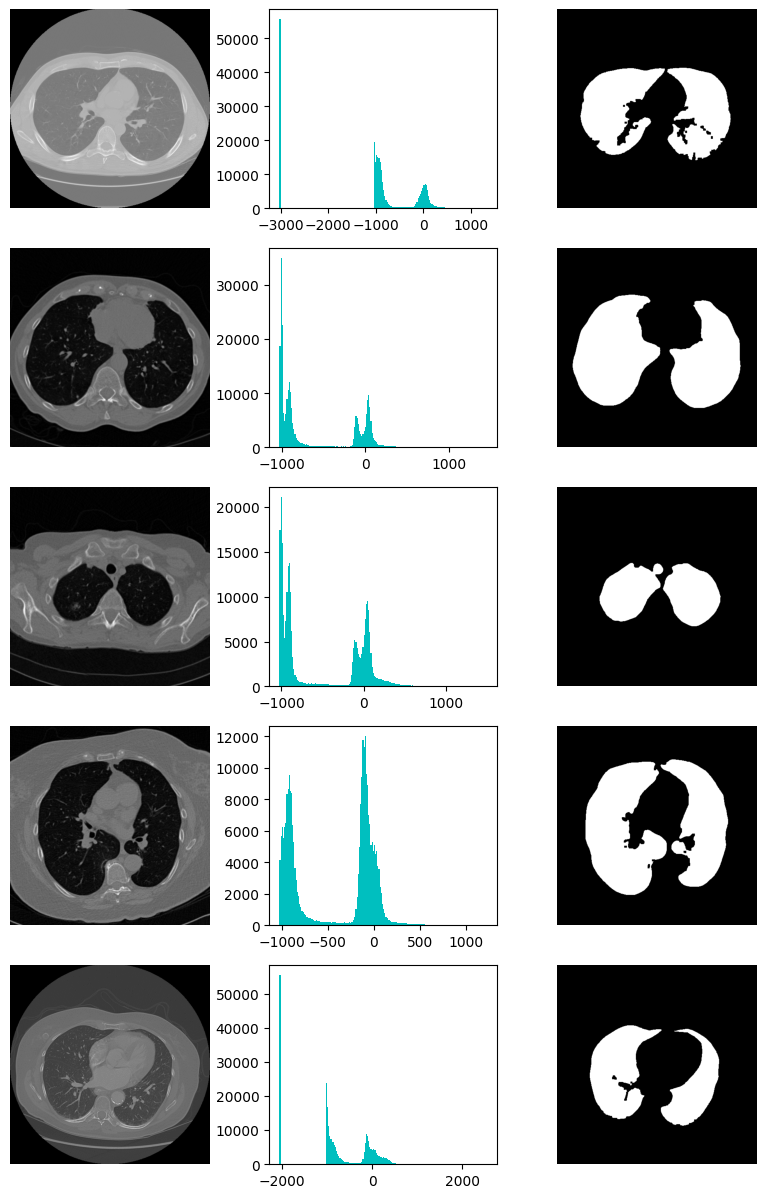

In [8]:
path = "D:/fin_de_etude/data/dataset_2d/"
mask_path = ""
lis = os.listdir(path)
fig, ax = plt.subplots(5, 3, figsize=(10, 15))
for i in range(5):
    img = np.load(os.path.join(path,lis[i]))
   
    smoothed = gaussian(img, sigma=1.0)
    seed_row, seed_col = np.argwhere(img==img.max())[0]
    # Define a mask to limit the region growing
 

    # Perform region growing using flood algorithm
    tolerance = 0.05
    filled =  flood_fill(smoothed, (seed_row, seed_col),0, tolerance=tolerance)


    cleaned_mask = remove_small_objects(filled.astype(bool), min_size=500)
    cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
    cleaned_mask = clear_border(cleaned_mask)

    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis("off")
    ax[i,1].hist(img.flatten(), bins=180, color='c')
    
    
    ax[i,2].imshow(cleaned_mask,cmap="gray")
    ax[i,2].axis("off")
    

C:\Users\gamer\AppData\Local\Temp\ipykernel_25432\571073158.py:18: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))


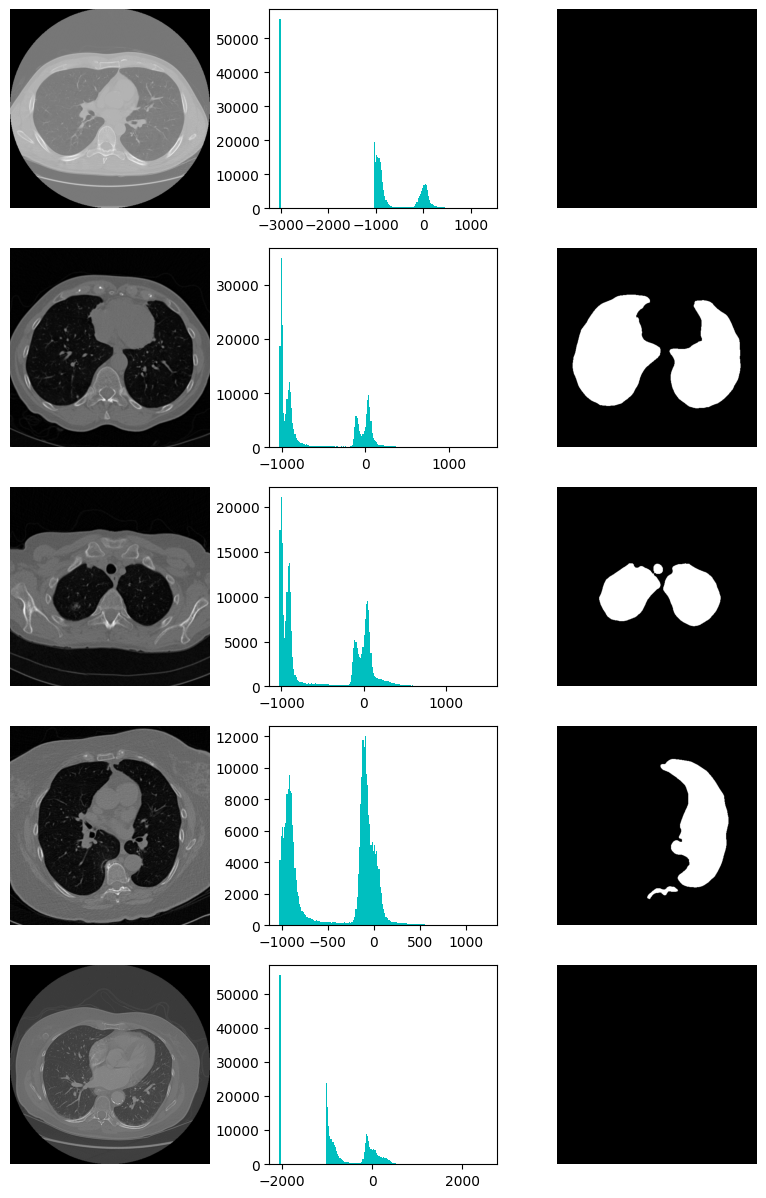

In [14]:
from skimage.feature import canny
from skimage import filters,morphology
from scipy import ndimage as ndi
path = "D:/fin_de_etude/data/dataset_2d/"
lis = os.listdir(path)
fig, ax = plt.subplots(5, 3, figsize=(10, 15))
for i in range(5):
    img = np.load(os.path.join(path,lis[i]))

    edges = canny(img, sigma=3, low_threshold=0.05, high_threshold=0.1)
    

    # Apply morphological operations to close gaps and fill in small holes
    #
    mask = edges.astype(np.uint8)
    mask =   ndi.binary_fill_holes(mask)
    cleaned_mask = remove_small_objects(mask.astype(bool), min_size=500)
    cleaned_mask = binary_closing(cleaned_mask, selem=np.ones((5,5)))
    cleaned_mask = clear_border(cleaned_mask)
    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis("off")
    ax[i,1].hist(img.flatten(), bins=180, color='c')
    
    
    ax[i,2].imshow(cleaned_mask,cmap="gray")
    ax[i,2].axis("off")  